# House Price Prediction

## Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [14]:
df=pd.read_csv(r'C:\users\rksan\Downloads\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


## Performing basic checks on data set

In [15]:
df.shape

(1168, 81)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      954 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            77 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-nu

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
#Percentage of null values in each columns
(df.isnull().sum()/df.shape[0])*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

## Performing EDA

In [19]:
def calc_null(df):
    return round((df.isnull().sum()/df.shape[0])*100,3)

###  1. Dropping the columns having more than 45% of missing values

In [20]:
calc_null(df)

Id                0.000
MSSubClass        0.000
MSZoning          0.000
LotFrontage      18.322
LotArea           0.000
                  ...  
MoSold            0.000
YrSold            0.000
SaleType          0.000
SaleCondition     0.000
SalePrice         0.000
Length: 81, dtype: float64

In [21]:
df = df.loc[:,~(df.isnull().sum()/df.shape[0]>0.45)]

In [22]:
df.shape

(1168, 76)

In [23]:
# Dropping unique columns as well
df=df.drop('Id',axis=1)

In [24]:
# Handling years column
#df['Age']=2020-df.GarageYrBlt
#df=df.drop('GarageYrBlt',axis=1)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.0,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.0,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,NaN,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000


#### 2. Checking the NA values in each column and treating it accordingly

In [26]:
calc_null(df)

MSSubClass        0.000
MSZoning          0.000
LotFrontage      18.322
LotArea           0.000
Street            0.000
                  ...  
MoSold            0.000
YrSold            0.000
SaleType          0.000
SaleCondition     0.000
SalePrice         0.000
Length: 75, dtype: float64

In [27]:
#Checking LotFrontage featrure
df.LotFrontage.describe()

count    954.00000
mean      70.98847
std       24.82875
min       21.00000
25%       60.00000
50%       70.00000
75%       80.00000
max      313.00000
Name: LotFrontage, dtype: float64

In [28]:
# Replacing the NaN value with mean for LotFrontage feature 
df.LotFrontage.fillna((df.LotFrontage.mean()), inplace = True)

In [29]:
# Checking BsmtQual
df.BsmtQual.value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [30]:
# Replacing the NA with No Basement for features BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
df.BsmtQual.fillna("No Basement", inplace = True)
df.BsmtCond.fillna("No Basement", inplace = True)
df.BsmtExposure.fillna("No Basement", inplace = True)
df.BsmtFinType1.fillna("No Basement", inplace = True)
df.BsmtFinType2.fillna("No Basement", inplace = True)

In [31]:
# Dropping the records which are having NA for features 'MasVnrType', 'MasVnrArea', 'Electrical'
df = df[pd.notnull(df['MasVnrType'])]
df = df[pd.notnull(df['MasVnrArea'])]
df = df[pd.notnull(df['Electrical'])]

In [32]:
# Replacing the NA with No Garage for features GarageType, GarageFinish, GarageQual, GarageCond
df.GarageType.fillna("No Garage", inplace = True)
df.GarageFinish.fillna("No Garage", inplace = True)
df.GarageQual.fillna("No Garage", inplace = True)
df.GarageCond.fillna("No Garage", inplace = True)

In [33]:
# Replacing the NA value with mean for LotFrontage feature 
df.GarageYrBlt.fillna((df.GarageYrBlt.mean()), inplace = True)

In [34]:
# Replacing the NA value with mean for Age feature 
#df.Age.fillna((df.Age.mean()), inplace = True)

In [35]:
calc_null(df)

MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 75, dtype: float64

#### 3. Checking the continues variables

In [36]:
# Continues(numerical) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,120,70.98847,4928,6,5,1976,1976,0.0,120,0,...,0,205,0,0,0,0,0,2,2007,128000
1,20,95.00000,15865,8,6,1970,1970,0.0,351,823,...,81,207,0,0,224,0,0,10,2007,268000
2,60,92.00000,9920,7,5,1996,1997,0.0,862,0,...,180,130,0,0,0,0,0,6,2007,269790
3,20,105.00000,11751,6,6,1977,1977,480.0,705,0,...,0,122,0,0,0,0,0,1,2010,190000
4,20,70.98847,16635,6,7,1977,2000,126.0,1246,0,...,240,0,0,0,0,0,0,6,2009,215000


In [37]:
# From Data dictionary we see that there are few variables which are treated as numerical variables 
# but we can treat them as categorical variables. So we are droping those columns from df_numeric DataFrame
# dropping the columns we want to treat as categorical variables
df_numeric = df_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd','BsmtFullBath',
                              'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd',
                              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'], axis=1)
df_numeric.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,70.98847,4928,0.0,120,0,958,1078,958,0,0,958,440,0,205,0,0,0,0,0,128000
1,95.00000,15865,0.0,351,823,1043,2217,2217,0,0,2217,621,81,207,0,0,224,0,0,268000
2,92.00000,9920,0.0,862,0,255,1117,1127,886,0,2013,455,180,130,0,0,0,0,0,269790
3,105.00000,11751,480.0,705,0,1139,1844,1844,0,0,1844,546,0,122,0,0,0,0,0,190000
4,70.98847,16635,126.0,1246,0,356,1602,1602,0,0,1602,529,240,0,0,0,0,0,0,215000


In [38]:
numerical_col=df_numeric.columns
numerical_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

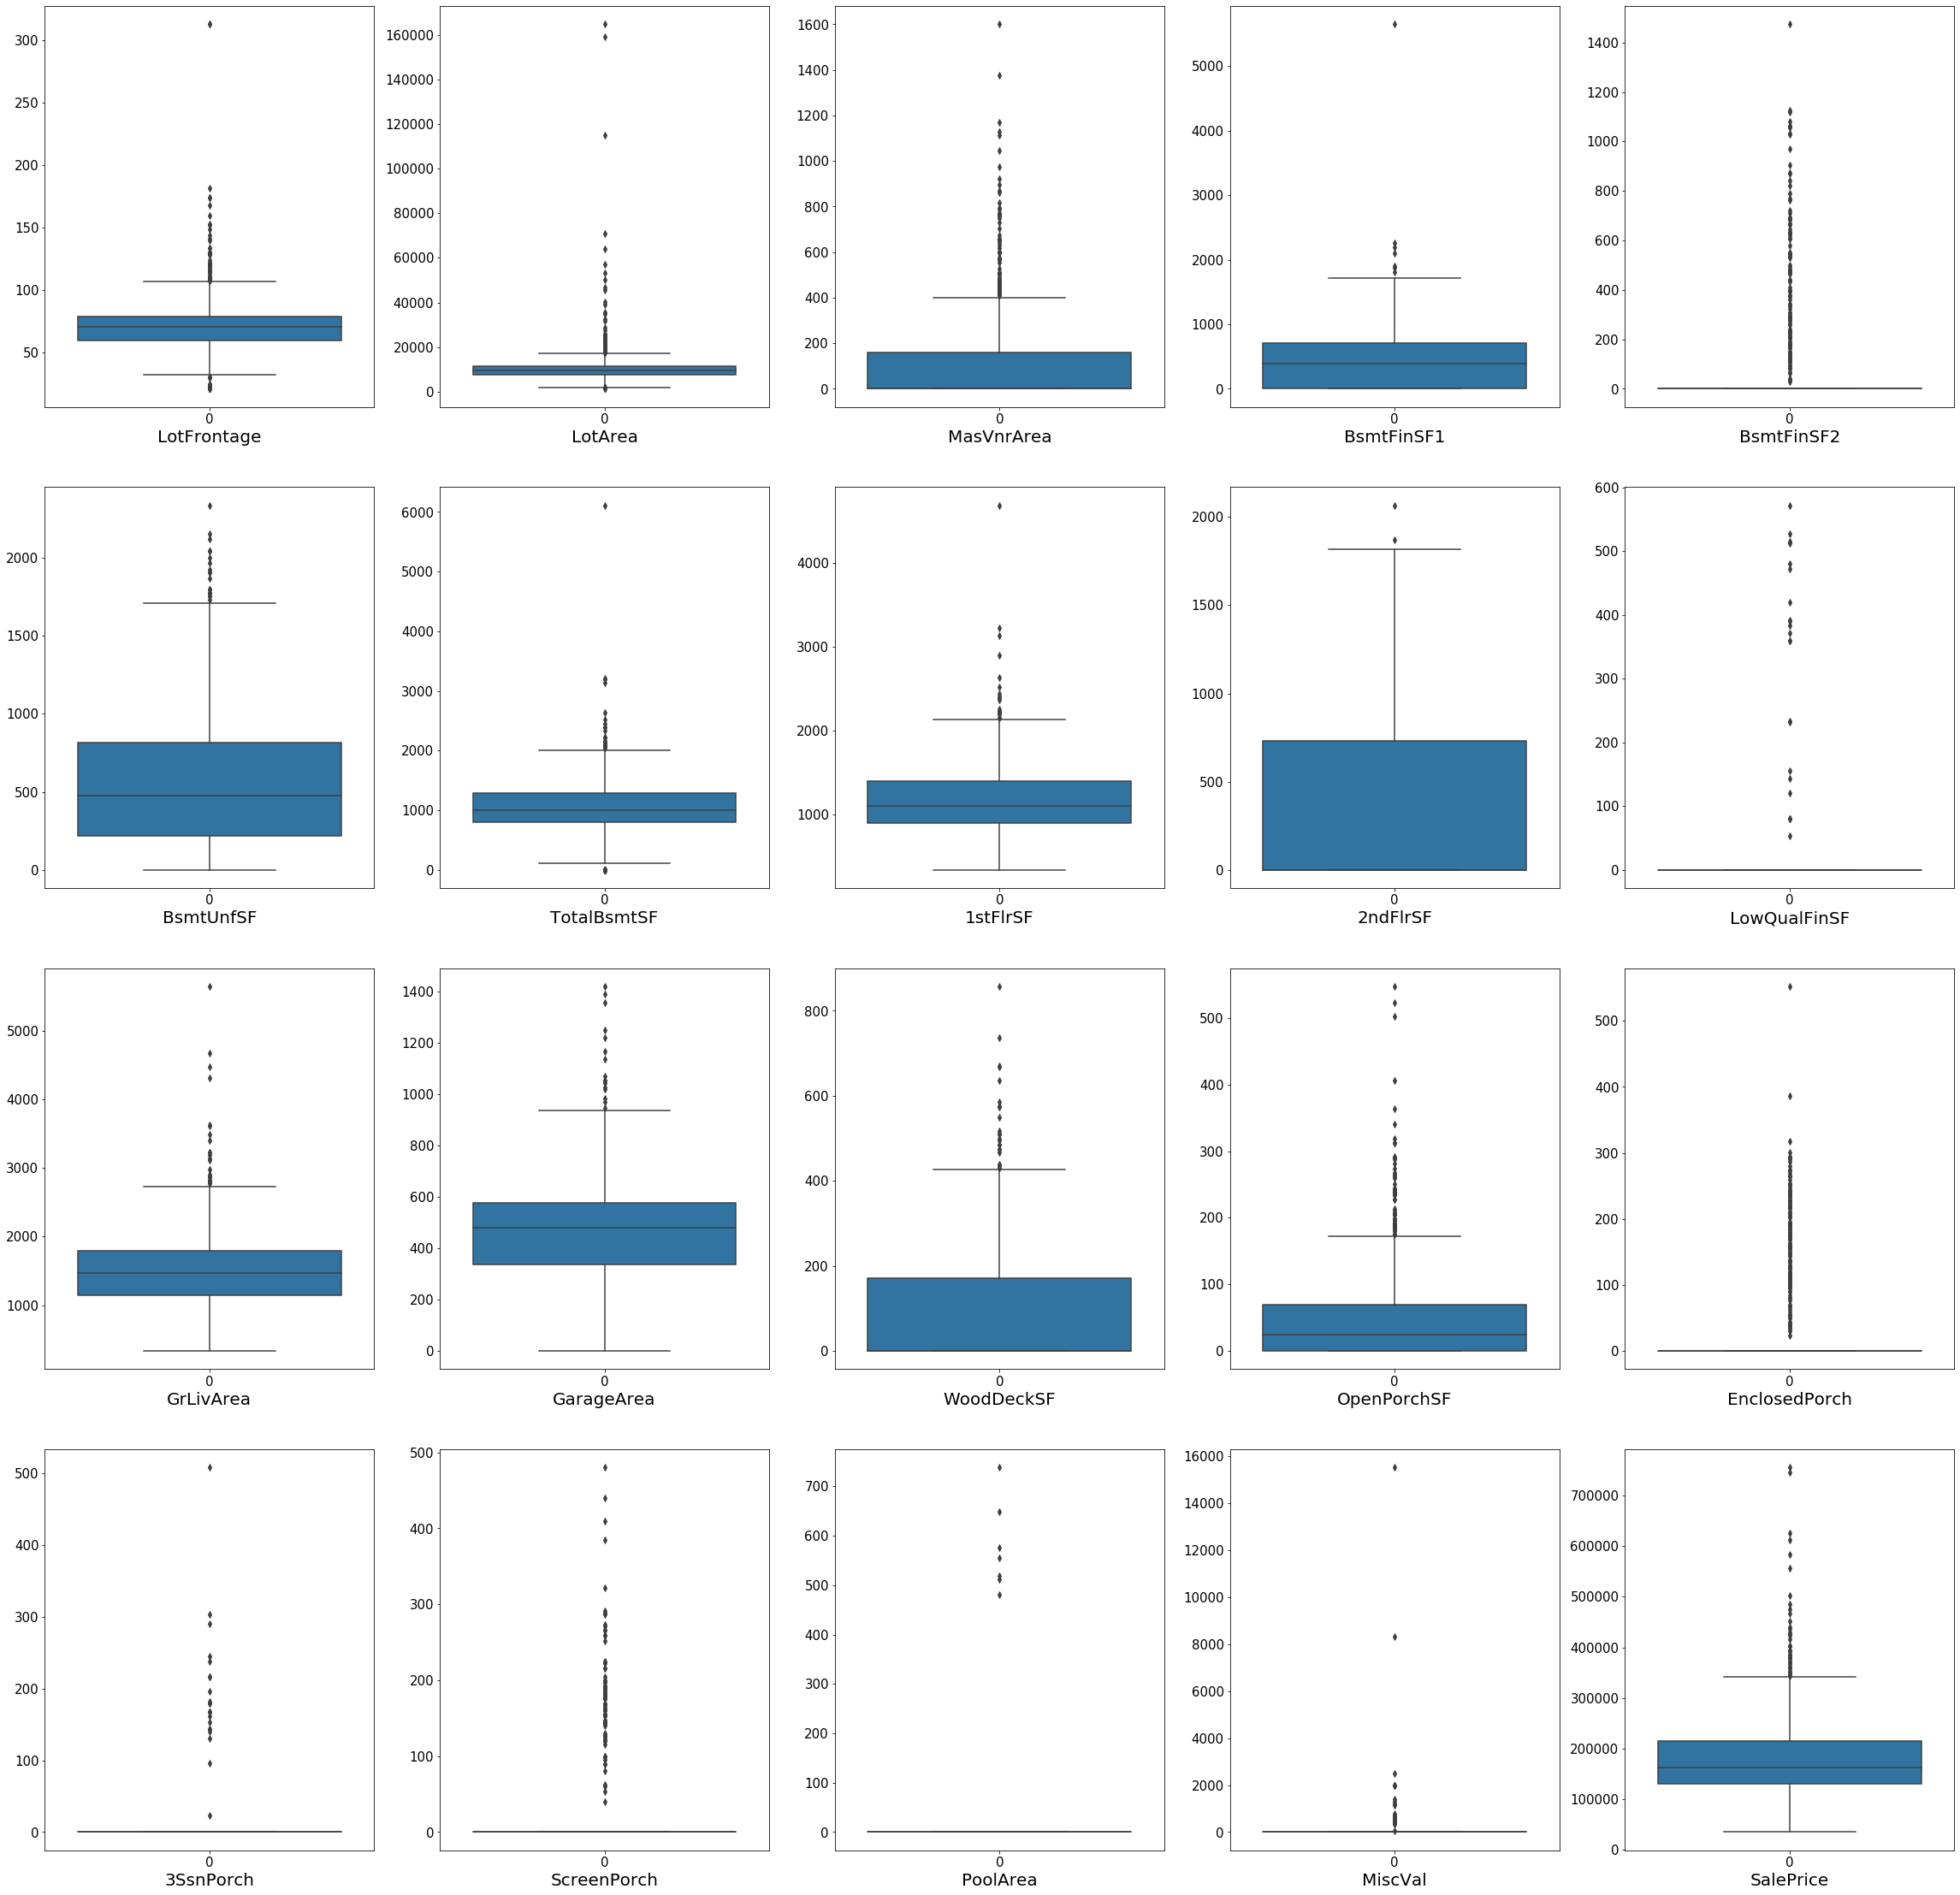

In [39]:
plt.figure(figsize=(40,50))
for i in range(len(numerical_col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df[numerical_col[i]])
    plt.xlabel(numerical_col[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

__So, we can see that there are outliers in out dataset.__

### Outlier Treatment

In [40]:
for i in range(len(numerical_col)):
    Q1=df[numerical_col[i]].quantile(0.0)
    Q3=df[numerical_col[i]].quantile(0.90)
    IQR=Q3-Q1
    df=df[(df[numerical_col[i]] >= Q1 - 1.5*IQR) & 
                          (df[numerical_col[i]] <= Q3 + 1.5*IQR)]

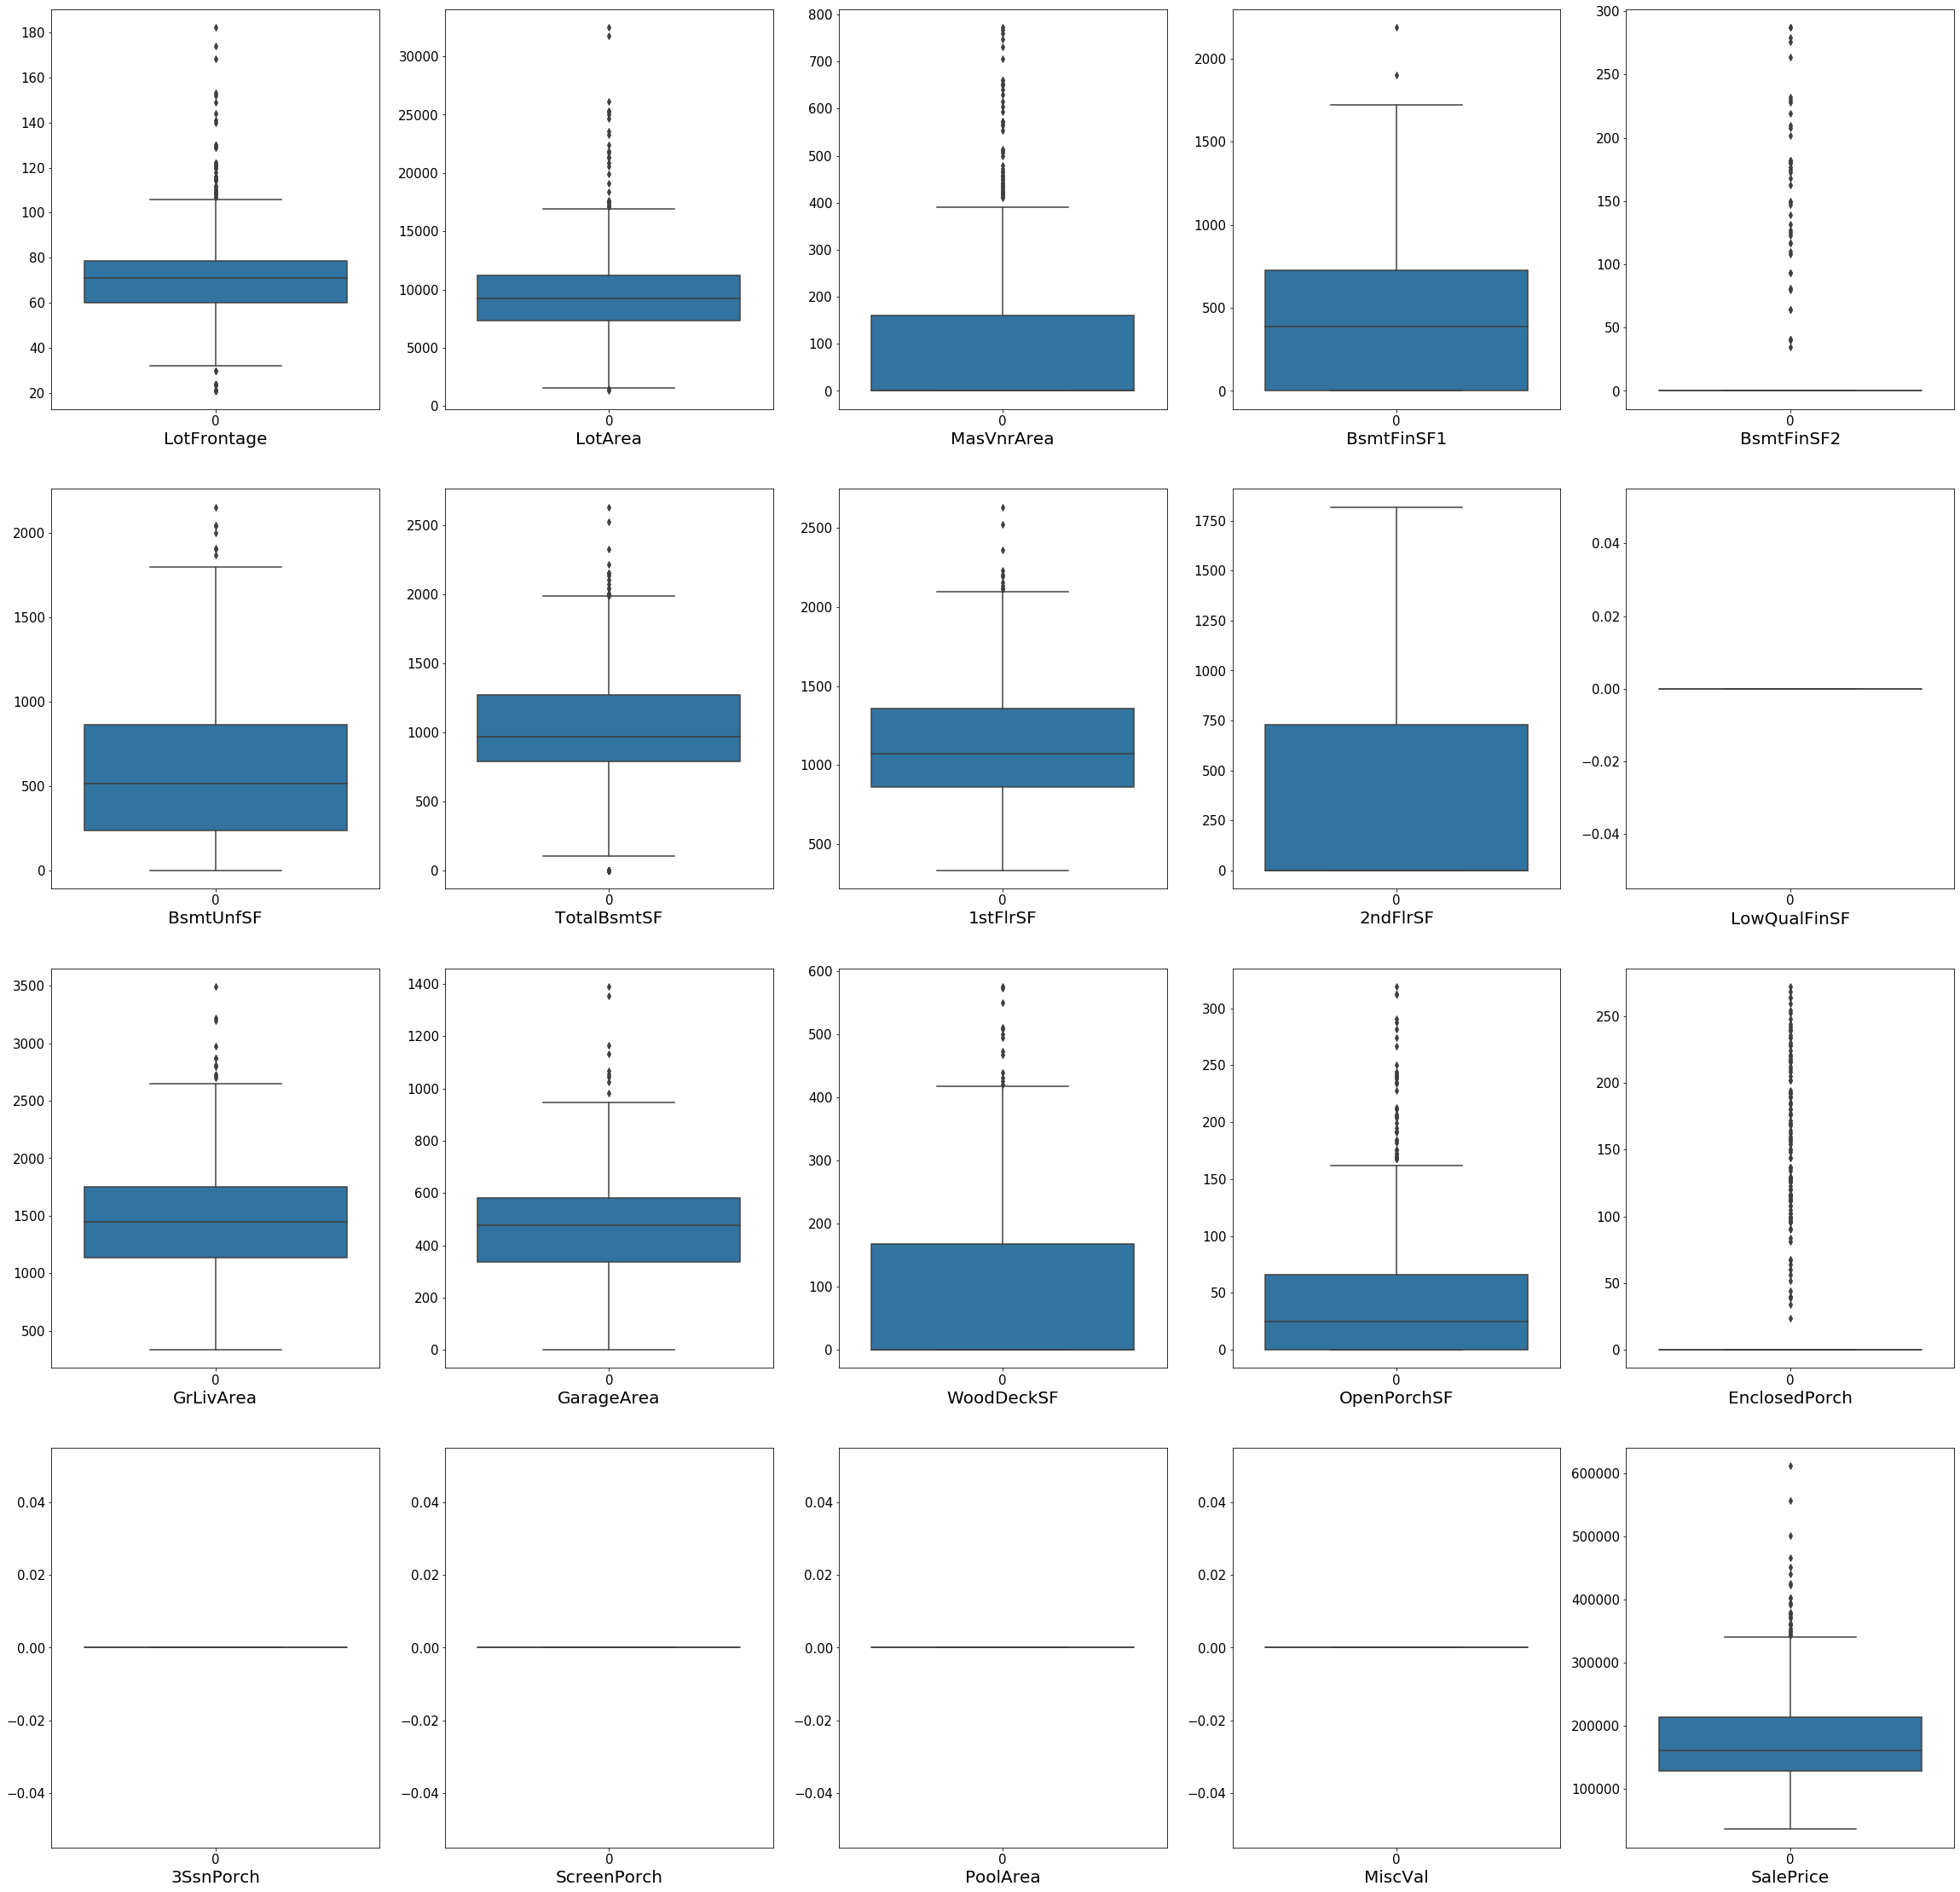

In [41]:
plt.figure(figsize=(40,50))
for i in range(len(numerical_col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df[numerical_col[i]])
    plt.xlabel(numerical_col[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

Observation: All Values for these 'LowQualFinSF','3SsnPorch','PoolArea','MiscVal' 4 variables are 0. So, will drop all these columns

In [42]:
df=df.drop(['LowQualFinSF','3SsnPorch','PoolArea','MiscVal'],axis=1)
df_numeric=df_numeric.drop(['LowQualFinSF','3SsnPorch','PoolArea','MiscVal'],axis=1)

In [43]:
numerical_col=df_numeric.columns
numerical_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SalePrice'],
      dtype='object')

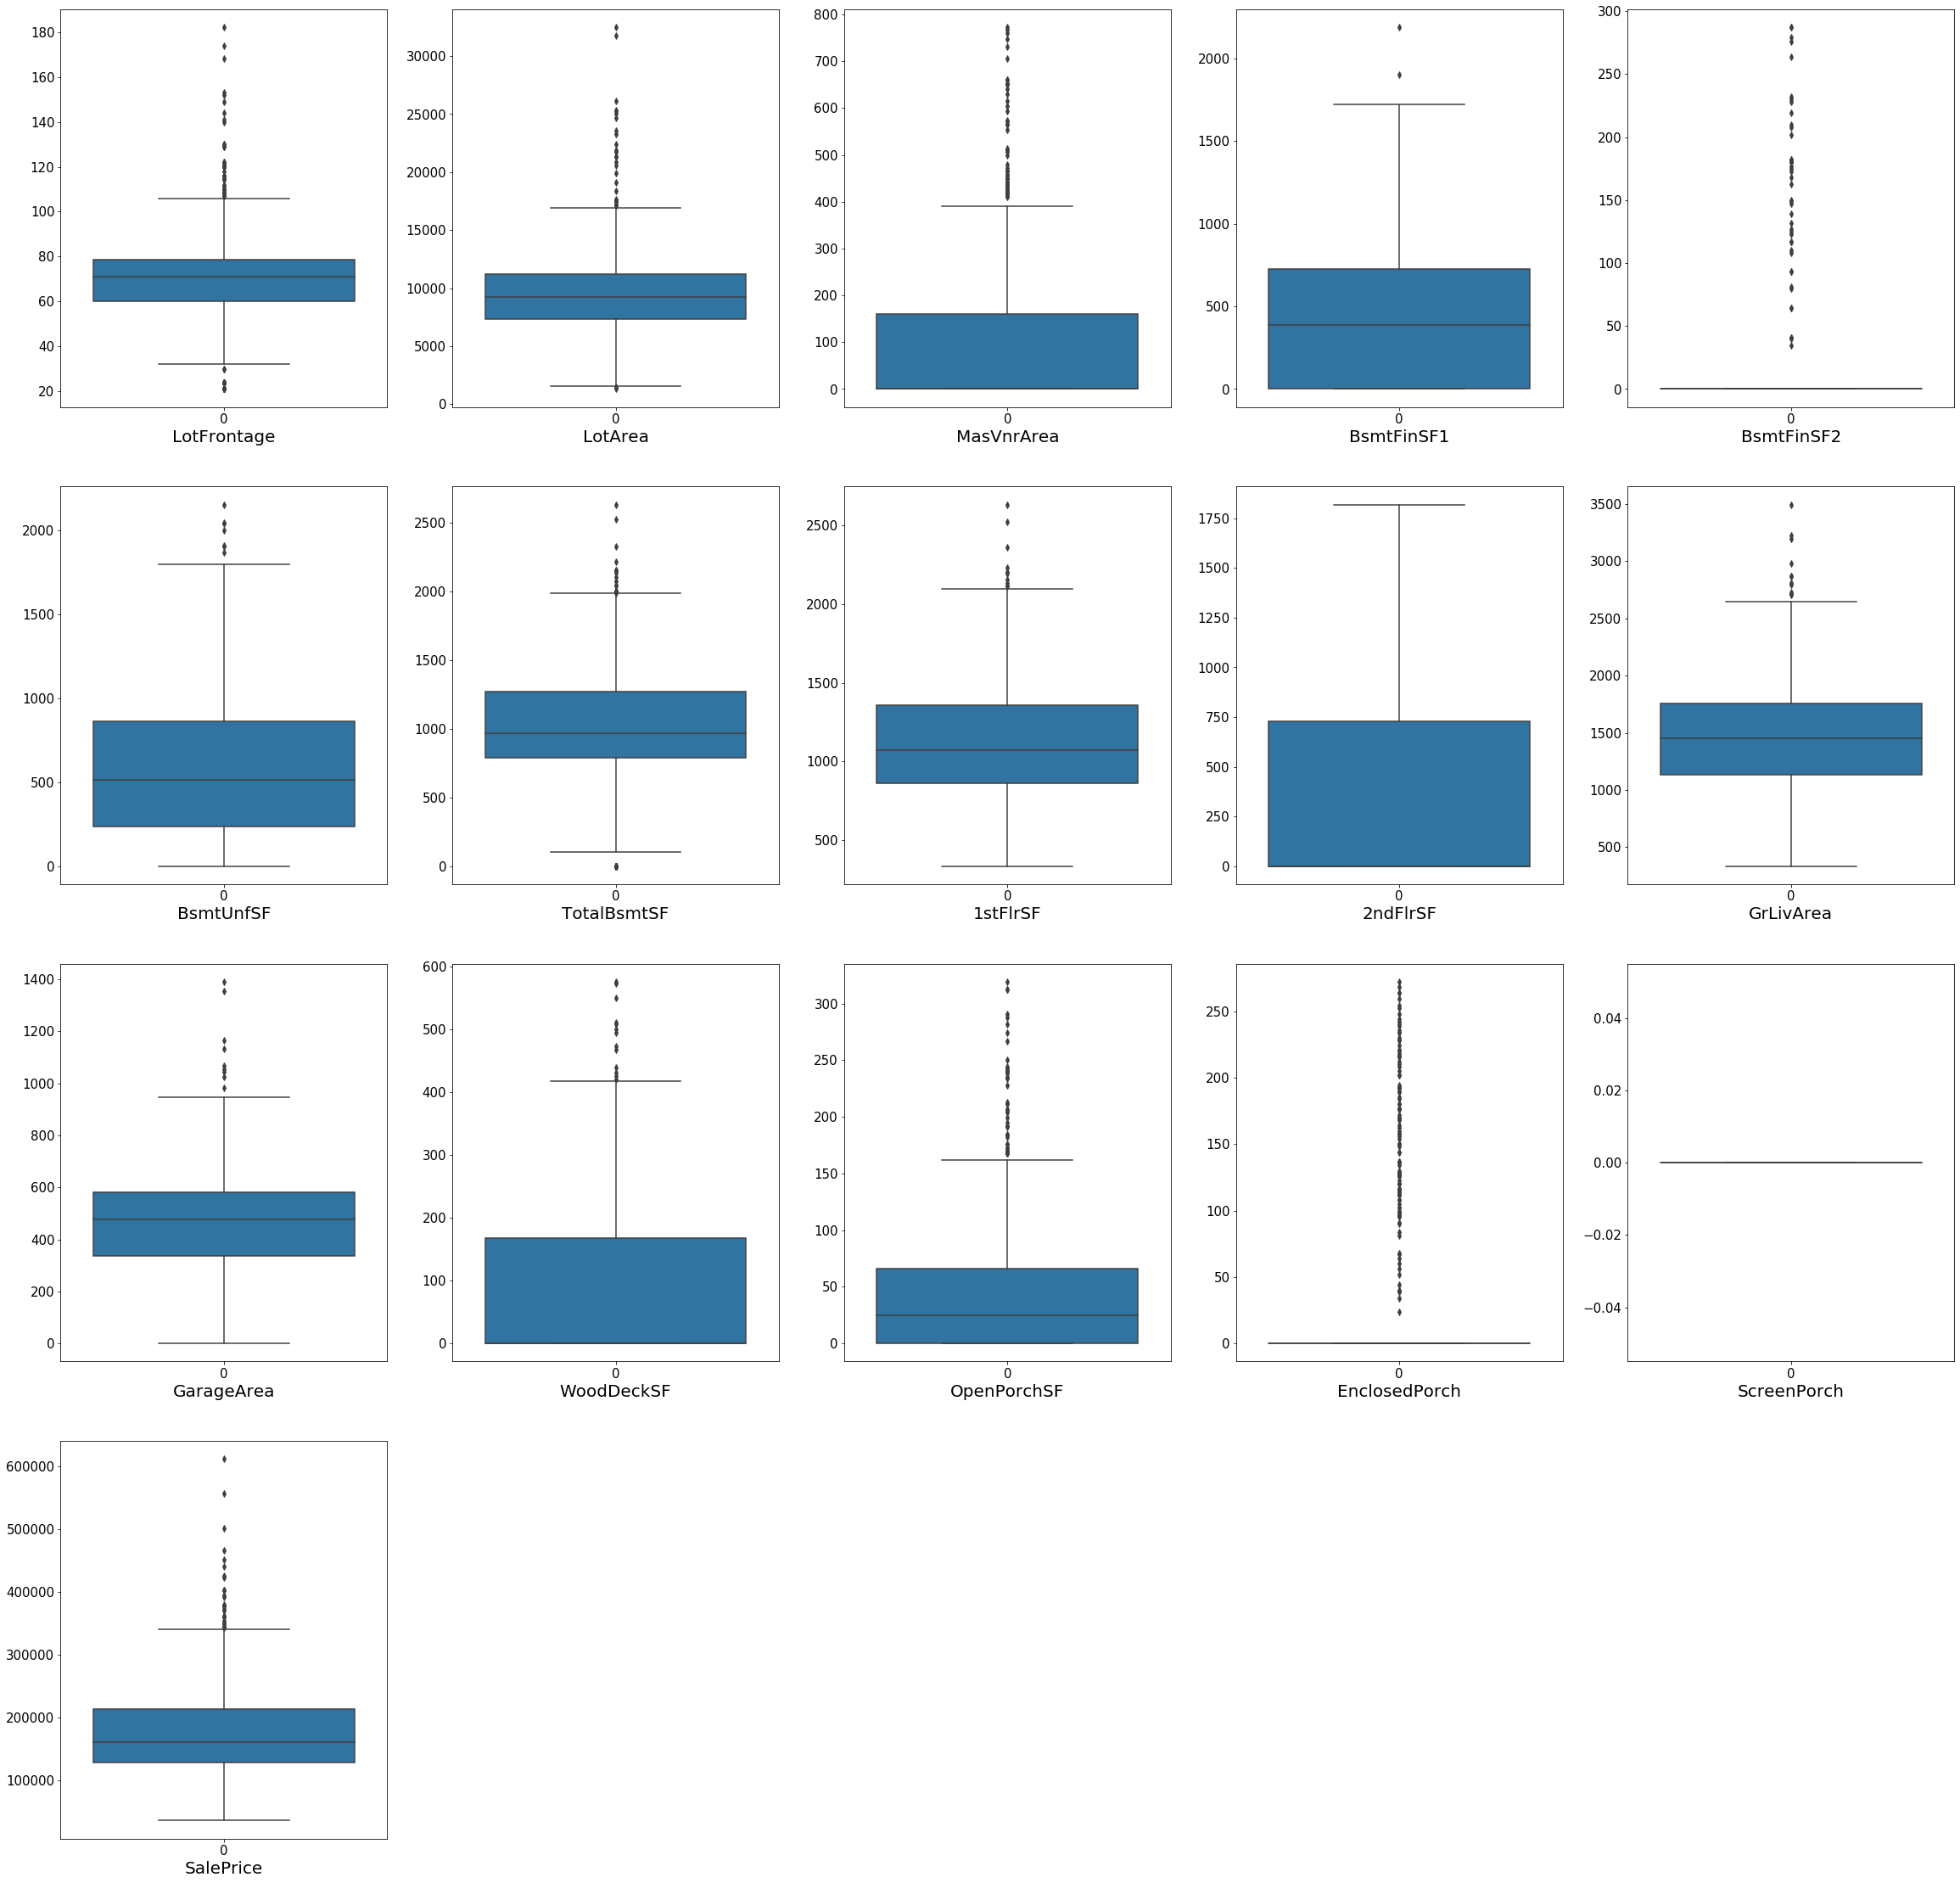

In [44]:
plt.figure(figsize=(40,50))
for i in range(len(numerical_col)):
    plt.subplot(5,5,i+1)
    sns.boxplot(data = df[numerical_col[i]])
    plt.xlabel(numerical_col[i],fontdict={'fontsize':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.show()

### Correlation

In [45]:
# Checking the correlation between numerical variables
corr = df_numeric.corr()
corr

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
LotFrontage,1.000000,0.299527,0.189278,0.230480,0.002408,0.111278,0.355325,0.404127,0.091039,0.374241,0.322229,0.087090,0.148923,0.021346,0.030728,0.321906
LotArea,0.299527,1.000000,0.121448,0.220294,0.057240,0.004469,0.256259,0.307850,0.062575,0.278716,0.195753,0.219025,0.095231,-0.013749,0.025720,0.250421
MasVnrArea,0.189278,0.121448,1.000000,0.267066,-0.065723,0.109850,0.366833,0.339938,0.173358,0.387891,0.365849,0.151978,0.131850,-0.102321,0.046509,0.466386
BsmtFinSF1,0.230480,0.220294,0.267066,1.000000,-0.051336,-0.501103,0.516661,0.442641,-0.126381,0.214123,0.284618,0.193530,0.103665,-0.086273,0.034703,0.359530
BsmtFinSF2,0.002408,0.057240,-0.065723,-0.051336,1.000000,-0.213945,0.099884,0.095433,-0.092173,-0.006460,-0.001338,0.094631,-0.012724,0.032360,0.076126,-0.008848
BsmtUnfSF,0.111278,0.004469,0.109850,-0.501103,-0.213945,1.000000,0.414777,0.307542,0.005122,0.233777,0.191817,-0.000243,0.140097,-0.014515,0.001317,0.217286
TotalBsmtSF,0.355325,0.256259,0.366833,0.516661,0.099884,0.414777,1.000000,0.811702,-0.161228,0.459679,0.492590,0.237353,0.246396,-0.093009,0.065922,0.594103
1stFlrSF,0.404127,0.307850,0.339938,0.442641,0.095433,0.307542,0.811702,1.000000,-0.201437,0.565718,0.477209,0.239357,0.209865,-0.056295,0.071933,0.588649
2ndFlrSF,0.091039,0.062575,0.173358,-0.126381,-0.092173,0.005122,-0.161228,-0.201437,1.000000,0.688189,0.137045,0.084608,0.255144,0.067981,0.048261,0.334605
GrLivArea,0.374241,0.278716,0.387891,0.214123,-0.006460,0.233777,0.459679,0.565718,0.688189,1.000000,0.459506,0.243488,0.369480,0.022244,0.096752,0.709033


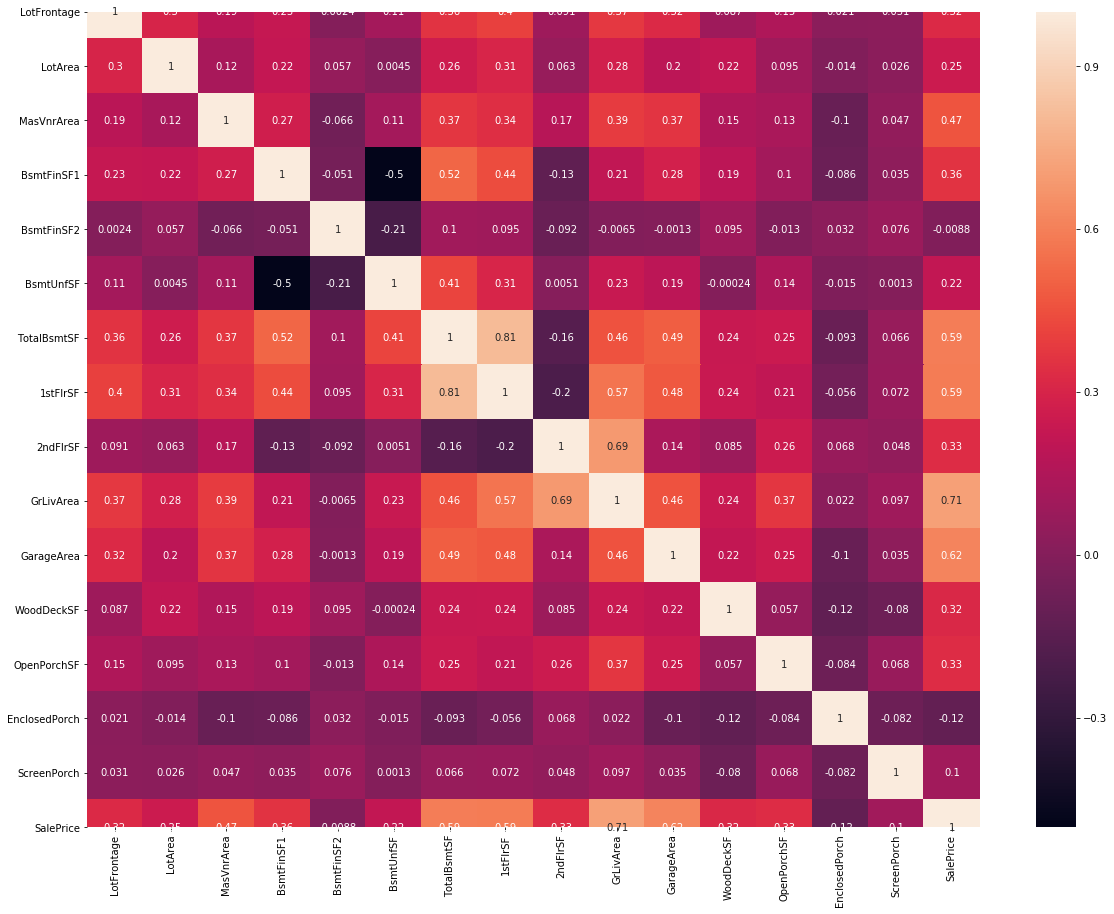

In [46]:
# Plotting the Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

In [47]:
numerical_col=df_numeric.columns
numerical_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'SalePrice'],
      dtype='object')

#### 4. Checking the categorical variables

In [48]:
# Converting numerical ciolumns to categorical columns
df.MSSubClass = df.MSSubClass.astype('object')
df.OverallQual = df.OverallQual.astype('object')
df.OverallCond = df.OverallCond.astype('object')
df.BsmtFullBath = df.BsmtFullBath.astype('object')
df.BsmtHalfBath = df.BsmtHalfBath.astype('object')
df.FullBath = df.FullBath.astype('object')
df.HalfBath = df.HalfBath.astype('object')
df.BedroomAbvGr = df.BedroomAbvGr.astype('object')
df.KitchenAbvGr = df.KitchenAbvGr.astype('object')
df.TotRmsAbvGrd = df.TotRmsAbvGrd.astype('object')
df.Fireplaces = df.Fireplaces.astype('object')
df.GarageCars = df.GarageCars.astype('object')

In [49]:
# Categorical variables in the dataset
df_cat = df.select_dtypes(include=['object'])
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
for col in df_cat.columns:
    print()
    print("**************** ",col," ****************")
    print(round((df[col].value_counts()/df.shape[0])*100,2))


****************  MSSubClass  ****************
20     35.84
60     21.57
50      9.10
120     6.07
70      4.72
30      4.72
160     4.49
90      4.27
80      2.70
190     2.25
85      1.80
45      1.12
75      0.67
180     0.56
40      0.11
Name: MSSubClass, dtype: float64

****************  MSZoning  ****************
RL         78.20
RM         15.06
FV          4.72
RH          1.57
C (all)     0.45
Name: MSZoning, dtype: float64

****************  Street  ****************
Pave    99.89
Grvl     0.11
Name: Street, dtype: float64

****************  LotShape  ****************
Reg    65.39
IR1    32.36
IR2     1.69
IR3     0.56
Name: LotShape, dtype: float64

****************  LandContour  ****************
Lvl    90.79
Bnk     3.82
HLS     3.71
Low     1.69
Name: LandContour, dtype: float64

****************  Utilities  ****************
AllPub    100.0
Name: Utilities, dtype: float64

****************  LotConfig  ****************
Inside     72.58
Corner     18.65
CulDSac     5.51
FR2 

__Observation:__ 
- Street, Utilities, Condition2, RoofMatl, Hea?ting columns has approx. 98% or more records containing same values. So, will drop those columns.
- LandSlope, BsmtHalfBath, KitchenAbvGr contain same value for approx 95% records.

In [51]:
# Dropping Street, Utilities, Condition2, RoofMatl, Heating
df = df.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating','LandSlope','BsmtHalfBath','KitchenAbvGr'], axis=1)
df.shape

(890, 63)

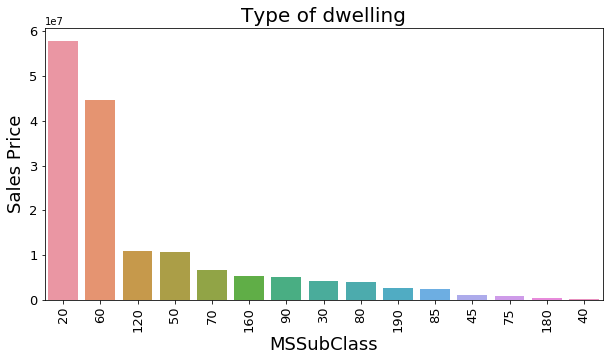

In [52]:
colName = 'MSSubClass'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('MSSubClass',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Type of dwelling',fontsize=20)
plt.show()

In [53]:
# Checking MSZoning columns
frq = df.MSZoning.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<5).dropna()
frq
df.MSZoning = df.MSZoning.replace(frq.index,'Others')  
df.MSZoning.value_counts()/df.shape[0]*100

RL        78.202247
RM        15.056180
Others     6.741573
Name: MSZoning, dtype: float64

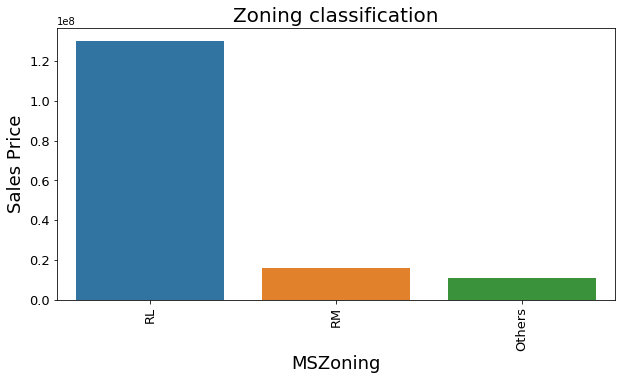

In [54]:
colName = 'MSZoning'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('MSZoning',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Zoning classification',fontsize=20)
plt.show()

In [55]:
# Checking LotShape columns
frq = df.LotShape.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<5).dropna()
frq
df.LotShape = df.LotShape.replace(frq.index,'Others')  
df.LotShape.value_counts()/df.shape[0]*100

Reg       65.393258
IR1       32.359551
Others     2.247191
Name: LotShape, dtype: float64

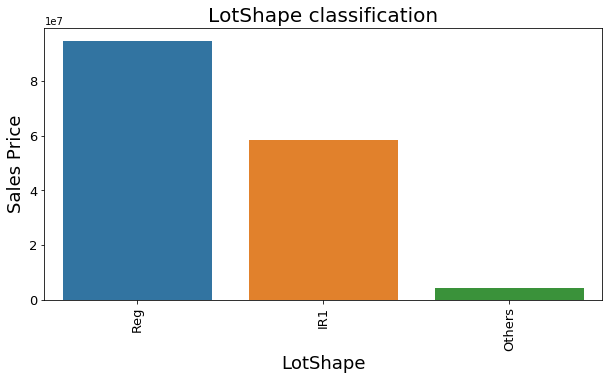

In [56]:
colName = 'LotShape'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('LotShape',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('LotShape classification',fontsize=20)
plt.show()

In [57]:
# Checking LotConfig columns
frq = df.LotConfig.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<10).dropna()
frq
df.LotConfig = df.LotConfig.replace(frq.index,'Others')  
df.LotConfig.value_counts()/df.shape[0]*100

Inside    72.584270
Corner    18.651685
Others     8.764045
Name: LotConfig, dtype: float64

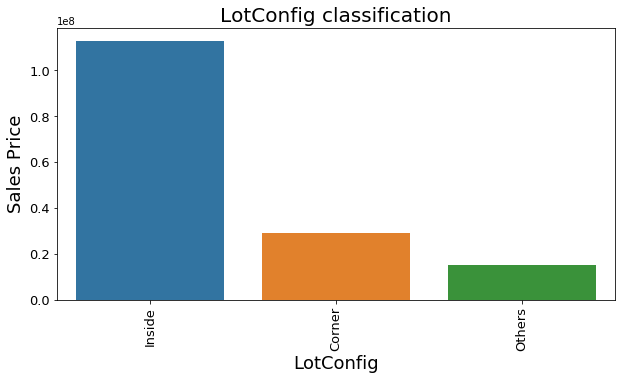

In [58]:
colName = 'LotConfig'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('LotConfig',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('LotConfig classification',fontsize=20)
plt.show()

In [59]:
# Checking Condition1 columns
frq = df.Condition1.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<1).dropna()
frq
df.Condition1 = df.Condition1.replace(frq.index,'Others')  
df.Condition1.value_counts()/df.shape[0]*100

Norm      86.853933
Feedr      5.280899
Artery     3.033708
RRAn       1.685393
PosN       1.235955
RRAe       1.011236
Others     0.898876
Name: Condition1, dtype: float64

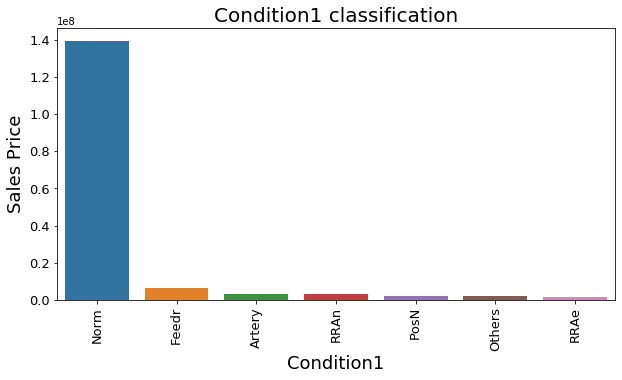

In [60]:
colName = 'Condition1'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Condition1',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Condition1 classification',fontsize=20)
plt.show()

In [61]:
# Checking HouseStyle columns
frq = df.HouseStyle.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<1).dropna()
frq
df.HouseStyle = df.HouseStyle.replace(frq.index,'Others')  
df.HouseStyle.value_counts()/df.shape[0]*100

1Story    49.550562
2Story    32.696629
1.5Fin     9.438202
SFoyer     3.146067
SLvl       3.146067
1.5Unf     1.235955
Others     0.786517
Name: HouseStyle, dtype: float64

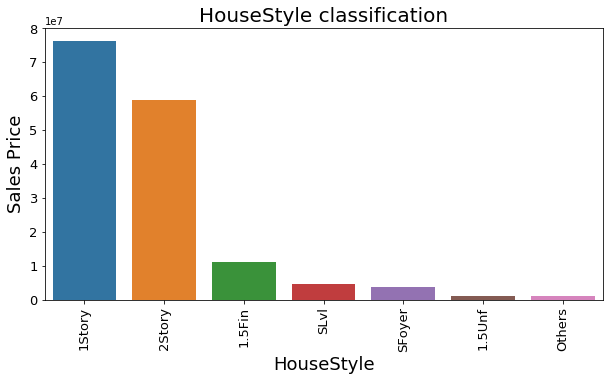

In [62]:
colName = 'HouseStyle'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('HouseStyle',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('HouseStyle classification',fontsize=20)
plt.show()

In [63]:
# Checking OverallCond columns
frq = df.OverallCond.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<2).dropna()
frq
df.OverallCond = df.OverallCond.replace(frq.index,'Others')  
df.OverallCond.value_counts()/df.shape[0]*100

5         58.202247
6         16.629213
7         12.247191
8          5.393258
4          3.820225
3          2.022472
Others     1.685393
Name: OverallCond, dtype: float64

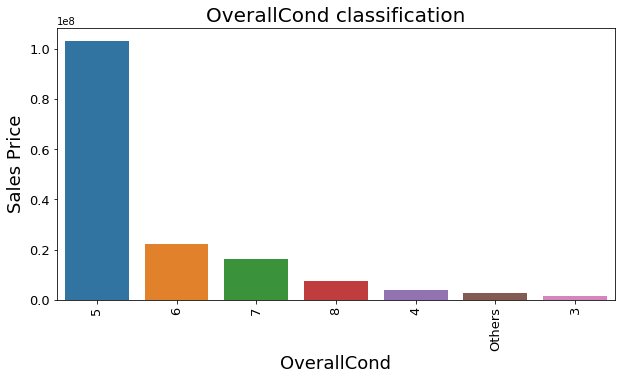

In [64]:
colName = 'OverallCond'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('OverallCond',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('OverallCond classification',fontsize=20)
plt.show()

In [65]:
# Checking RoofStyle columns
frq = df.RoofStyle.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<1).dropna()
frq
df.RoofStyle = df.RoofStyle.replace(frq.index,'Others')  
df.RoofStyle.value_counts()/df.shape[0]*100

Gable     80.898876
Hip       17.528090
Others     1.573034
Name: RoofStyle, dtype: float64

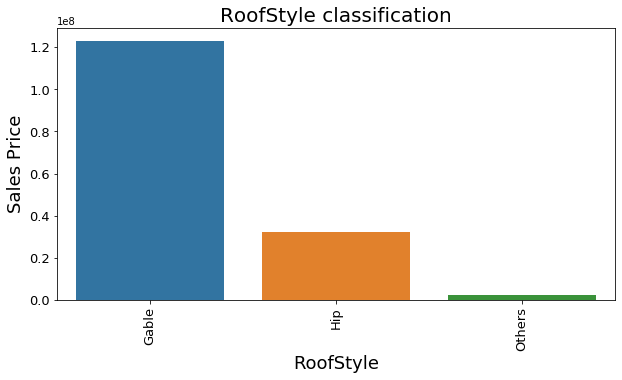

In [66]:
colName = 'RoofStyle'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('RoofStyle',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('RoofStyle classification',fontsize=20)
plt.show()

In [67]:
# Checking Exterior1st columns
frq = df.Exterior1st.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<0.15).dropna()
frq
df.Exterior1st = df.Exterior1st.replace(frq.index,'Others')  
df.Exterior1st.value_counts()/df.shape[0]*100

VinylSd    38.314607
HdBoard    15.505618
MetalSd    15.280899
Wd Sdng    12.921348
Plywood     6.292135
BrkFace     3.033708
CemntBd     3.033708
WdShing     1.910112
AsbShng     1.797753
Stucco      1.573034
Others      0.337079
Name: Exterior1st, dtype: float64

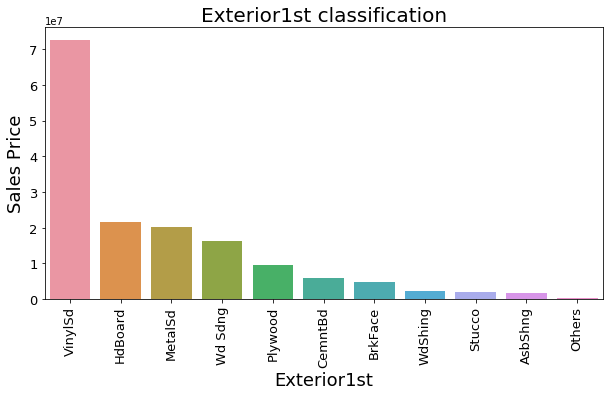

In [68]:
colName = 'Exterior1st'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Exterior1st',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Exterior1st classification',fontsize=20)
plt.show()

In [69]:
# Checking MasVnrType columns
frq = df.MasVnrType.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<10).dropna()
frq
df.MasVnrType = df.MasVnrType.replace(frq.index,'Others')  
df.MasVnrType.value_counts()/df.shape[0]*100

None       58.764045
BrkFace    31.348315
Others      9.887640
Name: MasVnrType, dtype: float64

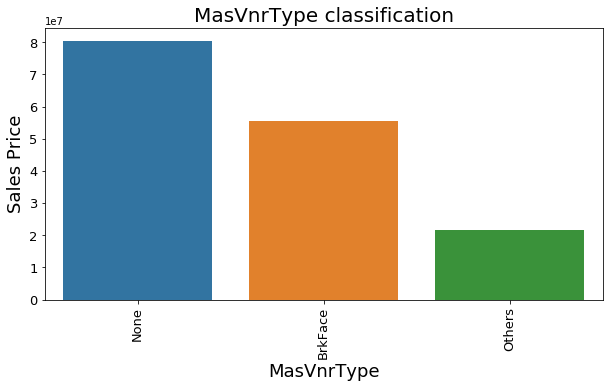

In [70]:
colName = 'MasVnrType'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('MasVnrType',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('MasVnrType classification',fontsize=20)
plt.show()

In [71]:
# Checking ExterQual columns ExterCond
frq = df.ExterQual.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<5).dropna()
frq
df.ExterQual = df.ExterQual.replace(frq.index,'Others')  
df.ExterQual.value_counts()/df.shape[0]*100

TA        60.112360
Gd        36.404494
Others     3.483146
Name: ExterQual, dtype: float64

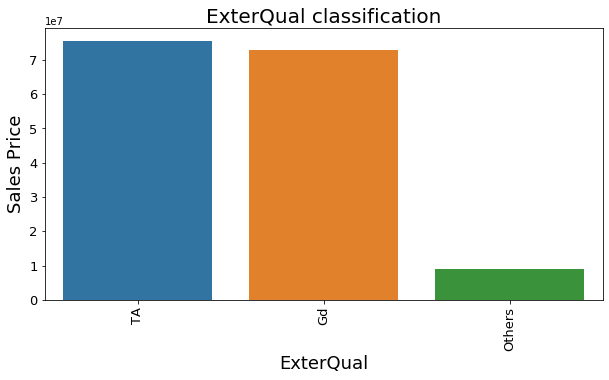

In [72]:
colName = 'ExterQual'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('ExterQual',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('ExterQual classification',fontsize=20)
plt.show()

In [73]:
# Checking ExterCond columns Foundation
frq = df.ExterCond.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<2).dropna()
frq
df.ExterCond = df.ExterCond.replace(frq.index,'Others')  
df.ExterCond.value_counts()/df.shape[0]*100

TA        88.426966
Gd         9.101124
Fa         2.359551
Others     0.112360
Name: ExterCond, dtype: float64

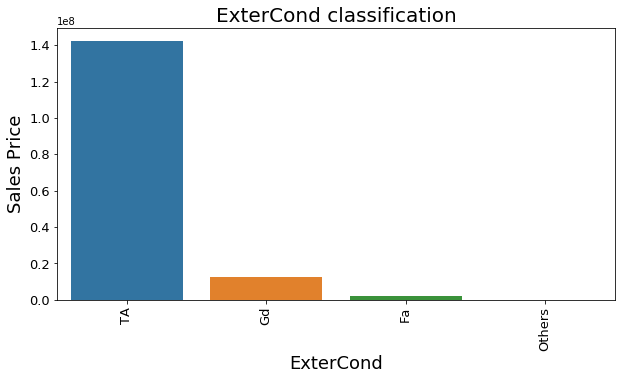

In [74]:
colName = 'ExterCond'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('ExterCond',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('ExterCond classification',fontsize=20)
plt.show()

In [75]:
# Checking Foundation columns 
frq = df.Foundation.value_counts(normalize=True,dropna=False)*100
frq = frq.where(frq<2).dropna()
frq
df.Foundation = df.Foundation.replace(frq.index,'Others')  
df.Foundation.value_counts()/df.shape[0]*100

PConc     47.191011
CBlock    40.786517
BrkTil     9.550562
Slab       2.022472
Others     0.449438
Name: Foundation, dtype: float64

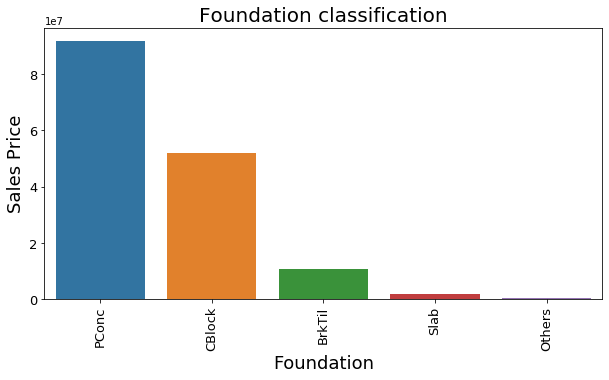

In [76]:
colName = 'Foundation'
grouped_df = df.groupby(colName)[[colName,'SalePrice']].sum().reset_index().sort_values('SalePrice',ascending=False)
plt.figure(figsize=(10,5))
plt_obj=sns.barplot(x=grouped_df[colName],y=grouped_df.SalePrice,order=grouped_df[colName])
plt_obj.set_xticklabels(plt_obj.get_xticklabels(),rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Foundation',fontsize = 18)
plt.ylabel('Sales Price',fontsize = 18)
plt.title('Foundation classification',fontsize=20)
plt.show()

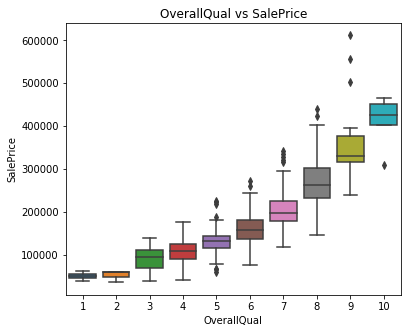

In [77]:
# Plotting the boxplot for OverallQual vs SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="OverallQual", y="SalePrice", data=df)
plt.title("OverallQual vs SalePrice")
plt.show()

Observation: As OverallQual increases, the SalePrice also increases.

#### 5. Checking the target variable

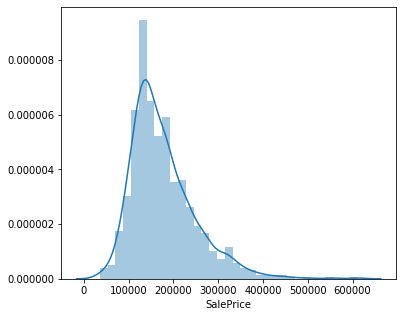

In [78]:
plt.figure(figsize=(6,5))
sns.distplot(df.SalePrice)
plt.show()

- Data is not normalized
- So, we are doing log transformation

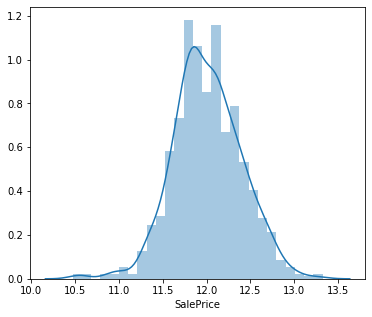

In [79]:
plt.figure(figsize=(6,5))
sns.distplot(np.log(df.SalePrice))
plt.show()

## Creating the dummy variables

In [80]:
# Taking all categorical variables
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,120,RL,IR1,Lvl,Inside,NPkVill,Norm,TwnhsE,1Story,6,...,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
2,60,RL,IR1,Lvl,Others,NoRidge,Norm,1Fam,2Story,7,...,Typ,1,Attchd,Unf,2,TA,TA,Y,WD,Normal
3,20,RL,IR1,Lvl,Inside,NWAmes,Norm,1Fam,1Story,6,...,Typ,1,Attchd,RFn,2,TA,TA,Y,COD,Normal
4,20,RL,IR1,Lvl,Others,NWAmes,Norm,1Fam,1Story,6,...,Typ,1,Attchd,Fin,2,TA,TA,Y,WD,Normal
5,60,RL,IR1,Lvl,Inside,Gilbert,Norm,1Fam,2Story,7,...,Typ,1,BuiltIn,Fin,3,TA,TA,Y,New,Partial


In [81]:
# convert into dummies
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [82]:
# Drop categorical variables 
df=df.drop(list(df_cat.columns), axis=1)

In [83]:
# concat dummy variables with df
df = pd.concat([df, df_dummies], axis=1)
df.shape

(890, 241)

## Splitting the data into Train and Test data set

In [84]:
#y = np.log(df.SalePrice)
#X = df.drop("SalePrice",1)

In [85]:
# split into train and test
#
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [86]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,train_size=0.7,
                                                    test_size = 0.3, random_state=100)


## Scalling the data sets

In [87]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[numerical_col] = scaler.fit_transform(df_train[numerical_col])
df_test[numerical_col] = scaler.transform(df_test[numerical_col])
X_train = df_train.drop('SalePrice',axis=1)
y_train = df_train.SalePrice
X_test = df_test.drop('SalePrice',axis=1)
y_test = df_test.SalePrice

## Linear Regression

In [88]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [89]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-20.906318880186856
[ 3.96484055e-03  7.40937353e-02  7.53641449e-03  2.10877000e-03
  7.06111921e-03  1.35360861e-01 -1.17204790e-02 -3.39666147e-03
  1.41856073e-01  5.07697969e-02  1.74162030e-01  2.00427947e-01
 -6.03379301e-04  1.59870266e-02  4.94384947e-02  3.31808736e-02
  3.75693894e-02 -1.08801856e-14  9.10286899e-03  1.08974549e-03
 -6.24393599e-03  1.00752739e-14  1.33289758e-02 -1.24343750e-01
 -7.03767653e-02  2.33379743e-02  2.28294507e-01 -2.31982245e-01
  4.75401115e-02 -1.13601091e-01 -1.33854455e-01 -2.57448450e-01
 -1.89536793e-02  1.63948420e-02 -1.62041624e-01 -2.23515782e-01
 -1.04721633e-01  4.39686743e-03  2.39745762e-03 -2.28714362e-01
 -5.26656262e-02  1.09357288e-02  7.28406445e-02 -1.29699359e-01
  1.76412978e-01 -2.31264400e-01 -6.93535956e-02 -2.01868491e-01
 -9.86491147e-03 -3.48688159e-01 -2.55727871e-01 -2.76146473e-01
  1.66607596e-01 -3.30816092e-01 -3.07388574e-01  1.30608531e-01
 -2.20768554e-01  3.04910513e-02  8.55457484e-02 -3.30071569e-01
 -4.2

In [90]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

0.9583889623429703
0.8655013582924591
25.923676460329514
43.31460623179854
0.04161103765702972
0.4027741173811995


## Ridge Regression

In [91]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

8.0


In [93]:
#Fitting Ridge model for alpha = 6 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.42443197e-02  4.82070709e-02  6.48928190e-03  3.92204794e-03
  2.44527112e-02  1.35454310e-01 -1.39237572e-02 -1.94863097e-02
  1.23215212e-01  1.02256626e-01  1.28941244e-01  1.96498211e-01
 -3.30677725e-04  4.42100098e-02  4.17082444e-02  3.89711991e-02
  3.06438097e-02  0.00000000e+00  7.65062148e-03  9.12636053e-03
  9.31169757e-03  0.00000000e+00  2.82250260e-02 -3.56897753e-02
  2.10183119e-02  9.98113845e-02  6.25808208e-02 -3.96832578e-02
 -1.34756885e-02 -8.95328326e-02 -2.92581087e-02 -1.14614644e-01
  4.30914601e-03 -5.28719028e-02  7.96710015e-03 -7.35087580e-02
 -4.12019873e-02 -9.77564744e-03  6.30189128e-02 -1.34276241e-01
 -2.85714151e-02  1.14287344e-02  4.50100775e-02 -5.87549735e-03
  6.06065112e-02  2.48657340e-02  3.50828740e-02 -7.31400492e-02
  1.74808069e-01 -1.31551633e-01 -1.01448399e-01 -2.04832955e-03
 -4.57286894e-02 -1.09518203e-01 -9.06482189e-02  5.59723393e-02
 -4.40510093e-02  8.42237882e-02  1.21942845e-01 -7.05143164e-02
 -5.63394997e-02 -5.52909

In [94]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): ",end="")
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): ",end="")
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 score (Train): 0.9457201321917775
R2 score (Test): 0.887577391878362
RSS (Train): 33.81635764452262
RSS (Test): 36.20513144607857
RMSE (Train): 0.23298040219774388
RMSE (Test): 0.3682387041631283


In [95]:
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=1000]
ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023541,3.362819e-02,0.003786,7.479942e-04,0.0001,{'alpha': 0.0001},-0.282712,-0.259252,-0.256187,-0.287146,...,-0.271484,0.012292,26,-0.133351,-0.129267,-0.137292,-0.131475,-0.130594,-0.132396,0.002784
1,0.006395,1.498210e-03,0.003982,8.923400e-04,0.001,{'alpha': 0.001},-0.281631,-0.258940,-0.256045,-0.286645,...,-0.271026,0.012064,25,-0.133376,-0.129258,-0.137304,-0.131574,-0.130619,-0.132426,0.002783
2,0.006183,9.767468e-04,0.003391,4.885973e-04,0.01,{'alpha': 0.01},-0.273697,-0.256854,-0.254512,-0.282841,...,-0.267520,0.010589,24,-0.133671,-0.129188,-0.137434,-0.132305,-0.130813,-0.132682,0.002807
3,0.005191,4.017563e-04,0.003588,4.916487e-04,0.05,{'alpha': 0.05},-0.262844,-0.251504,-0.249745,-0.275672,...,-0.260712,0.009412,23,-0.134416,-0.129730,-0.138002,-0.133724,-0.131265,-0.133427,0.002840
4,0.005987,5.576345e-06,0.003587,7.996611e-04,0.1,{'alpha': 0.1},-0.255047,-0.248050,-0.246052,-0.271298,...,-0.255915,0.009021,22,-0.134954,-0.130383,-0.138594,-0.134731,-0.131698,-0.134072,0.002860
5,0.006183,7.460095e-04,0.003394,1.019279e-03,0.2,{'alpha': 0.2},-0.245300,-0.243394,-0.241834,-0.264408,...,-0.249621,0.008358,21,-0.135779,-0.131322,-0.139635,-0.136158,-0.132478,-0.135074,0.002942
6,0.006184,9.771651e-04,0.002393,4.888307e-04,0.3,{'alpha': 0.3},-0.239615,-0.240071,-0.239521,-0.259812,...,-0.245545,0.007937,20,-0.136592,-0.132354,-0.140560,-0.137219,-0.133341,-0.136013,0.002932
7,0.006188,1.465092e-03,0.003593,4.993817e-04,0.4,{'alpha': 0.4},-0.235440,-0.237312,-0.238072,-0.256655,...,-0.242567,0.007809,19,-0.137574,-0.133206,-0.141312,-0.137997,-0.134157,-0.136849,0.002908
8,0.006386,1.491811e-03,0.002989,6.316055e-04,0.5,{'alpha': 0.5},-0.231929,-0.234998,-0.236839,-0.254218,...,-0.240112,0.007860,18,-0.138530,-0.133955,-0.141918,-0.138616,-0.134957,-0.137595,0.002857
9,0.006184,9.780733e-04,0.003789,9.774092e-04,0.6,{'alpha': 0.6},-0.228921,-0.232993,-0.235708,-0.252001,...,-0.237956,0.007918,17,-0.139361,-0.134616,-0.142465,-0.139130,-0.135795,-0.138273,0.002793


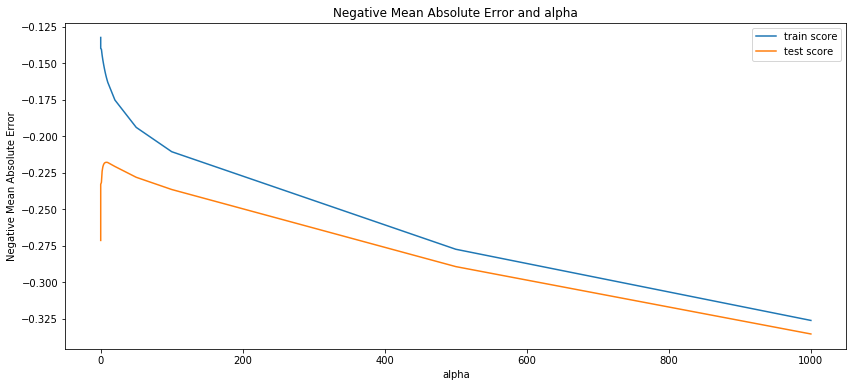

In [96]:
# plotting mean test and train scoes with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')
plt.figure(figsize=(14,6))

# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

Observation:
- The above plot defines the way to decide the optimum value of alpha.
- The point in which train and test score has less gap between them is the value which we take as an optimum value of alpha
- From the above plot, we came to know that the value with alpha = 6 has a minimum gap between the test and the training score.
- From the above result, we can see the train data has 0.94 as its R2 value, on test data we have 0.91 as R2 value. So it is pretty much predicting well.
- We can say it hasn't overfitted because the test data(91% r2 value) comparable value when compared to train data(94% r2 value)

## Lasso Regression

In [97]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

0.001


In [99]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [100]:
lasso.coef_

array([ 1.58227000e-02,  4.58439845e-02,  6.81179915e-03,  3.52160205e-03,
        1.27136466e-02,  1.43629321e-01, -6.29749532e-03,  0.00000000e+00,
        8.35984829e-02,  0.00000000e+00,  8.44755602e-03,  3.48099289e-01,
        2.32928386e-04,  3.78524955e-02,  3.80161359e-02,  3.51530374e-02,
        2.75440889e-02,  0.00000000e+00,  5.49603936e-03,  6.07115487e-03,
        0.00000000e+00,  0.00000000e+00,  1.89455676e-02, -2.22060369e-02,
        0.00000000e+00,  6.71634035e-02,  4.97521587e-02, -0.00000000e+00,
       -0.00000000e+00, -1.55684342e-01, -0.00000000e+00, -1.27122314e-01,
       -0.00000000e+00, -9.02097250e-02, -0.00000000e+00, -3.95827463e-02,
       -0.00000000e+00, -0.00000000e+00,  1.38745514e-02, -1.71630448e-01,
       -2.49557947e-02,  8.98347443e-03,  3.47692230e-02, -0.00000000e+00,
        3.31464278e-02,  4.64484819e-02,  0.00000000e+00, -8.45874109e-03,
        2.87237326e-01, -9.59567207e-02, -3.40856130e-02,  0.00000000e+00,
       -0.00000000e+00, -

In [101]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score (Train): ",end="")
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score (Test): ",end="")
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train): ",end="")
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test): ",end="")
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE (Train): ",end="")
print(mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE (Test): ",end="")
print(mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

R2 score (Train): 0.9476112896290417
R2 score (Test): 0.8957748756977405
RSS (Train): 32.63816656110703
RSS (Test): 33.56517330806261
RMSE (Train): 0.22888580203009165
RMSE (Test): 0.3545592469260375


In [102]:
# cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077978,6.934367e-03,0.004788,7.467229e-04,0.0001,{'alpha': 0.0001},-0.244009,-0.241251,-0.243240,-0.262667,...,-0.248311,0.007804,3,-0.135297,-0.131345,-0.139883,-0.137116,-0.132965,-0.135321,0.003013
1,0.034138,7.451194e-03,0.003397,1.351262e-03,0.001,{'alpha': 0.001},-0.219236,-0.213502,-0.225342,-0.226990,...,-0.222504,0.005373,1,-0.155521,-0.151864,-0.158844,-0.153715,-0.155200,-0.155029,0.002305
2,0.008178,7.463402e-04,0.002992,6.309019e-04,0.01,{'alpha': 0.01},-0.238160,-0.233897,-0.241418,-0.247064,...,-0.242559,0.006480,2,-0.222182,-0.219981,-0.225243,-0.219081,-0.221359,-0.221569,0.002127
3,0.006578,1.948715e-03,0.003200,3.950808e-04,0.05,{'alpha': 0.05},-0.300882,-0.293311,-0.320968,-0.327784,...,-0.307262,0.014404,4,-0.303185,-0.304412,-0.297202,-0.298673,-0.300514,-0.300797,0.002694
4,0.005887,1.357606e-03,0.003191,3.992091e-04,0.1,{'alpha': 0.1},-0.333584,-0.312569,-0.338502,-0.347517,...,-0.327813,0.015529,5,-0.325405,-0.327843,-0.319736,-0.318949,-0.322742,-0.322935,0.003357
5,0.004986,4.623108e-07,0.003591,7.978917e-04,0.2,{'alpha': 0.2},-0.415207,-0.381174,-0.405627,-0.384551,...,-0.385719,0.025282,6,-0.381565,-0.384256,-0.379944,-0.381980,-0.379616,-0.381472,0.001661
6,0.006383,1.739807e-03,0.003590,7.974744e-04,0.3,{'alpha': 0.3},-0.489492,-0.439345,-0.480164,-0.433699,...,-0.447866,0.033688,7,-0.447570,-0.437659,-0.443236,-0.441626,-0.447807,-0.443580,0.003815
7,0.005786,1.599240e-03,0.003190,3.954411e-04,0.4,{'alpha': 0.4},-0.548998,-0.481489,-0.548406,-0.482263,...,-0.499491,0.043493,8,-0.501070,-0.486716,-0.495884,-0.490421,-0.496723,-0.494163,0.005034
8,0.005585,1.197219e-03,0.002792,7.462129e-04,0.5,{'alpha': 0.5},-0.606347,-0.534567,-0.611191,-0.535615,...,-0.553406,0.049605,9,-0.548504,-0.541447,-0.548008,-0.546964,-0.553500,-0.547685,0.003847
9,0.004987,2.780415e-07,0.002792,3.989698e-04,0.6,{'alpha': 0.6},-0.605729,-0.557678,-0.611091,-0.552624,...,-0.565942,0.039702,14,-0.548328,-0.564762,-0.547941,-0.564793,-0.583546,-0.561874,0.013146


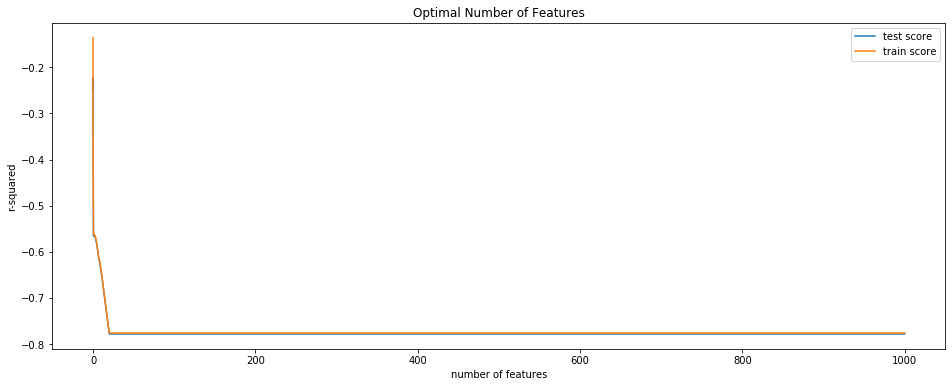

In [103]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(lasso_results["param_alpha"], lasso_results["mean_test_score"])
plt.plot(lasso_results["param_alpha"], lasso_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')
plt.show()

Observation
- The above plot defines the way to decide the optimum value of alpha.
- The point in which train and test score has less gap between them is the value which we take as an optimum value of alpha
- From the above plot, we came to know that the value with alpha = 0.001 has a minimum gap between the test and the training score.
- From the above result, we can see the train data has 0.94 as its R2 value, on test data we have 0.91 as R2 value. So it is pretty much predicting well.
- We can say it hasn't overfitted because the test data(91% r2 value) comparable value when compared to train data(94% r2 value)

## Final table comparing all the 3 regression techniques

In [104]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.958389,0.945720,0.947611
1,R2 Score (Test),0.865501,0.887577,0.895775
2,RSS (Train),25.923676,33.816358,32.638167
3,RSS (Test),43.314606,36.205131,33.565173
4,RMSE (Train),0.203988,0.232980,0.228886
5,RMSE (Test),0.402774,0.368239,0.354559


__Conclusion__
- From the above two techniques of Lasso and Ridge Regression, we can say that both almost having the same r2 value.
- When comparing the complexity, it is better to use Lasso because as we have 238 variables, Lasso will make the feature selection among the present variables, but Ridge will not reduce columns, it will keep all 238 variables with the reducing the coefficient of variables.

In [105]:
X_train.shape

(623, 240)

## Lets observe the changes in the coefficients after regularization

In [106]:
betas = pd.DataFrame(index=X_train.columns)

In [107]:
betas.rows = X_train.columns

In [108]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [109]:
pd.set_option('display.max_rows', None)
betas.head(50)

,Linear,Ridge,Lasso
LotFrontage,3.964841e-03,0.024244,0.015823
LotArea,7.409374e-02,0.048207,0.045844
YearBuilt,7.536414e-03,0.006489,0.006812
YearRemodAdd,2.108770e-03,0.003922,0.003522
MasVnrArea,7.061119e-03,0.024453,0.012714
BsmtFinSF1,1.353609e-01,0.135454,0.143629
BsmtFinSF2,-1.172048e-02,-0.013924,-0.006297
BsmtUnfSF,-3.396661e-03,-0.019486,0.000000
TotalBsmtSF,1.418561e-01,0.123215,0.083598
1stFlrSF,5.076980e-02,0.102257,0.000000


## Top 20 features from RIDGE regressoin

In [110]:
betas.Ridge.sort_values(ascending=False).head(20)

Neighborhood_StoneBr    0.332754
OverallQual_9           0.267742
GrLivArea               0.196498
Neighborhood_Crawfor    0.174808
BsmtExposure_Gd         0.170136
Functional_Typ          0.168190
Exterior1st_BrkFace     0.165941
OverallQual_8           0.155514
BsmtFinSF1              0.135454
2ndFlrSF                0.128941
SaleCondition_Normal    0.128656
OverallCond_8           0.127318
OverallCond_Others      0.125530
TotalBsmtSF             0.123215
Neighborhood_NridgHt    0.121943
GarageCars_3            0.115110
OverallCond_6           0.110763
OverallQual_10          0.109049
BsmtCond_TA             0.107562
1stFlrSF                0.102257
Name: Ridge, dtype: float64

## Top 20 features from LASSO regressoin

In [111]:
betas.Lasso.sort_values(ascending=False).head(20)

OverallQual_10          0.724002
Neighborhood_StoneBr    0.610661
OverallQual_9           0.574844
GrLivArea               0.348099
OverallQual_8           0.311459
Neighborhood_Crawfor    0.287237
Exterior1st_BrkFace     0.275184
BsmtExposure_Gd         0.222035
Functional_Typ          0.221692
Neighborhood_NridgHt    0.220781
Neighborhood_NoRidge    0.199592
OverallCond_8           0.192859
OverallCond_Others      0.183656
GarageCars_3            0.157957
OverallCond_6           0.145888
OverallCond_7           0.143757
BsmtFinSF1              0.143629
SaleCondition_Normal    0.135766
BedroomAbvGr_1          0.121448
OverallQual_7           0.112814
Name: Lasso, dtype: float64

## Conclusion:
### - From the above two techniques of Lasso and Ridge Regression, we can say that both almost having the same r2 value.
### - When comparing the complexity, it is better to use Lasso because as we have 238 variables, Lasso will make the feature selection among the present variables, but Ridge will not reduce columns, it will keep all 238 variables with the reducing the coefficient of variables.